In [14]:
# !pip install standard-precip

In [15]:
import dataretrieval as dr
from standard_precip.spi import SPI as SPI_Calculator
from standard_precip.utils import plot_index
import numpy as np
import spei as si  # si for standardized index
import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt
import config

In [16]:
# first import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# specify the USGS site code for which we want data.

site = config.CURRENT_REFERENCE_GAGE
site = "12043300"


# get daily values (dv)
data = nwis.get_record(sites=site, service='dv', start='1900-12-31', end='2020-01-01')
data = data.reset_index()
# data["datetime"] = data.index


# # get basic info about the site
site_info = nwis.get_record(sites=site, service='site')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22320 entries, 0 to 22319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   datetime          22320 non-null  datetime64[ns, UTC]
 1   site_no           22320 non-null  object             
 2   00060_Mean        22320 non-null  float64            
 3   00060_Mean_cd     22320 non-null  object             
 4   00065_Maximum     6633 non-null   float64            
 5   00065_Maximum_cd  6633 non-null   object             
 6   00065_Minimum     6633 non-null   float64            
 7   00065_Minimum_cd  6633 non-null   object             
 8   00065_Mean        6644 non-null   float64            
 9   00065_Mean_cd     6644 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 1.7+ MB


In [18]:
streamflow = "00060_Mean"
discharge_timeseries = data[streamflow]

<Axes: >

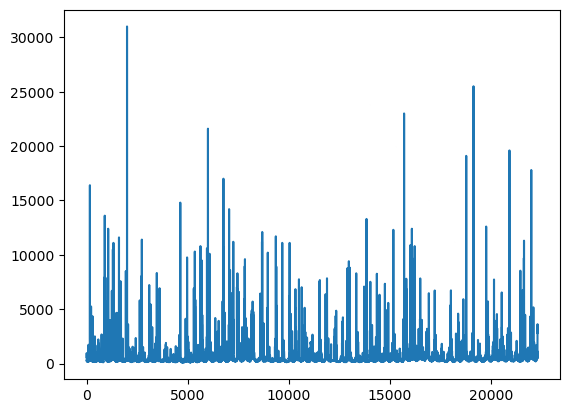

In [19]:
discharge_timeseries.plot.line()

In [20]:
spi_calculator = SPI_Calculator()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22320 entries, 0 to 22319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   datetime          22320 non-null  datetime64[ns, UTC]
 1   site_no           22320 non-null  object             
 2   00060_Mean        22320 non-null  float64            
 3   00060_Mean_cd     22320 non-null  object             
 4   00065_Maximum     6633 non-null   float64            
 5   00065_Maximum_cd  6633 non-null   object             
 6   00065_Minimum     6633 non-null   float64            
 7   00065_Minimum_cd  6633 non-null   object             
 8   00065_Mean        6644 non-null   float64            
 9   00065_Mean_cd     6644 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 1.7+ MB


In [21]:
ACCUMULATION_WINDOW_IN_DAYS = 365*2
# DROUGHT_LENGTH = 365*20
spi = spi_calculator.calculate(
    data, 
    'datetime', 
    streamflow, 
    freq="D", 
    scale=ACCUMULATION_WINDOW_IN_DAYS, 
    fit_type="lmom", 
    dist_type="gev"
)
spi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22320 entries, 0 to 22319
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   datetime                               22320 non-null  datetime64[ns, UTC]
 1   00060_Mean_scale_730                   21591 non-null  float64            
 2   00060_Mean_scale_730_calculated_index  21591 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 523.3 KB


<Axes: xlabel='datetime'>

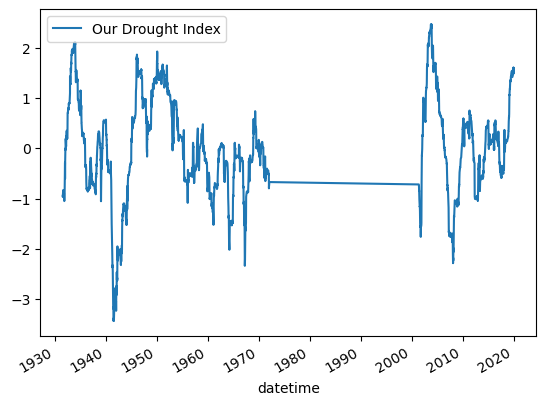

In [22]:
spi = spi.rename(columns = {f"{streamflow}_scale_{ACCUMULATION_WINDOW_IN_DAYS}_calculated_index": "Our Drought Index"})
spi.plot(x="datetime", y = f"Our Drought Index")
# spi['rolling mean'] = spi['Our Drought Index'].rolling(DROUGHT_LENGTH, min_periods=1).apply(np.mean)
# spi.plot(x="datetime", y = f"rolling mean")



In [23]:
spi["month"] = spi["datetime"].dt.month
spi["day"] = spi["datetime"].dt.day
spi["year"] = spi["datetime"].dt.year
spi = spi[spi["month"] == 10]
spi = spi[spi["day"] == 1]

<Axes: xlabel='datetime'>

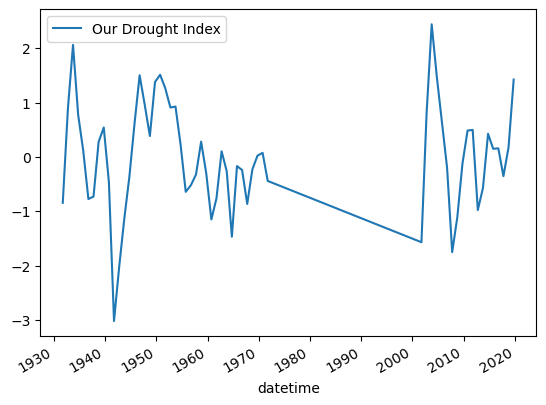

In [24]:
spi.plot(x="datetime", y = f"Our Drought Index")

In [25]:
spi[spi["year"] == 2009]

,datetime,00060_Mean_scale_730,Our Drought Index,month,day,year
18575,2009-10-01 00:00:00+00:00,455547.0,-0.125137,10,1,2009


<Axes: >

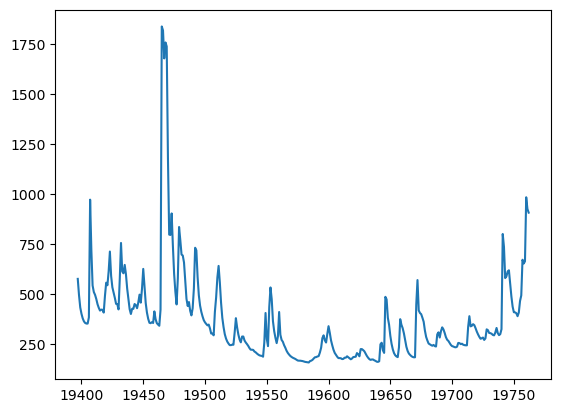

In [26]:
data["year"] = data["datetime"].dt.year
data[data["year"] == 2012][streamflow].plot.line()